# Rhys

In [ ]:
import pandas as pd
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")
df.head()
df.columns
df.shape
df_cleaned = df.copy().drop(['incident_id','address'], axis=1)

df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape
df_cleaned = df_cleaned[df_cleaned['killed'] < 15]
df_cleaned = df_cleaned[df_cleaned['injured'] < 20]
print(df_cleaned)
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

        incident_date         state  city_or_county  killed  injured
0         May 26 2021      Illinois         Chicago       0        4
1         May 26 2021    California        San Jose      10        0
2         May 24 2021      Michigan         Inkster       2        2
3         May 24 2021          Ohio  West Jefferson       4        0
4         May 23 2021      Illinois         Chicago       0        4
...               ...           ...             ...     ...      ...
2925  January 12 2014       Alabama      Huntsville       0        5
2926  January 11 2014   Mississippi         Jackson       0        4
2927   January 5 2014  Pennsylvania            Erie       1        3
2928   January 3 2014      New York          Queens       1        3
2929   January 1 2014      Virginia         Norfolk       2        2

[2921 rows x 5 columns]


,killed,injured
count,2921.000000,2921.000000
mean,1.007189,3.981171
std,1.455369,1.949356
min,0.000000,0.000000
25%,0.000000,3.000000
50%,1.000000,4.000000
75%,1.000000,5.000000
max,13.000000,19.000000


### Above is a standard, mean, max and min of our dataset after it was filtered to remove injured and killed outliers.
### As you can see only about only about 1 person is killed and 4 injured per incident.

### Below is a scatter plot of how many were per incident each state

<AxesSubplot:title={'center':'Amount Killed in each State'}, xlabel='state', ylabel='killed'>

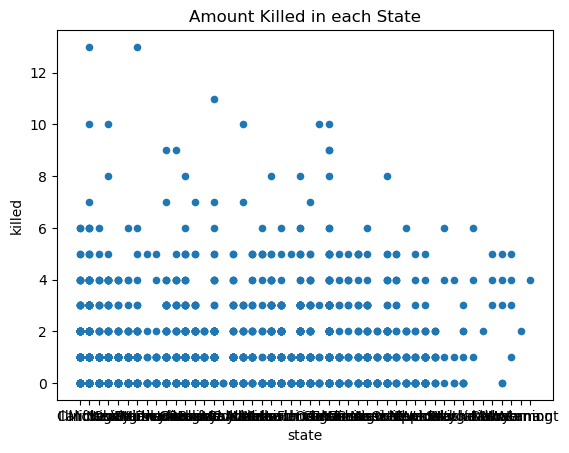

In [27]:
df_cleaned.plot(kind = 'scatter', x = 'state', y = 'killed', title = "Number of Killed in each State")

### Below is a scatter plot of the number of people injured per incident seperated by state.

<AxesSubplot:title={'center':'Number injured in each state'}, xlabel='state', ylabel='injured'>

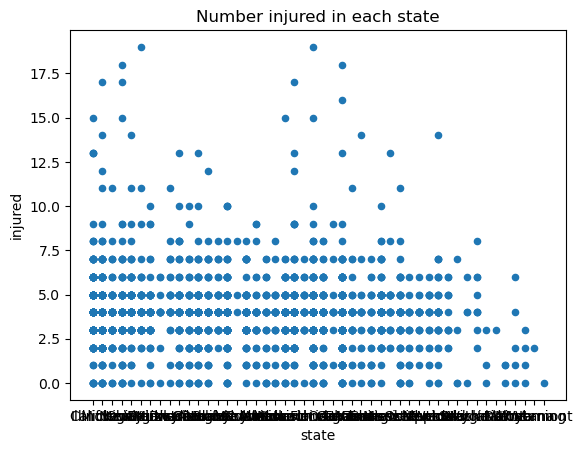

In [29]:
df_cleaned.plot(kind = 'scatter', x = 'state', y = 'injured', title = 'Number injured in each state')

### The graph below shows the frequency of how many people were killed per incident analzyed.

<AxesSubplot:title={'center':'Frequency of killed per incident'}, ylabel='Frequency'>

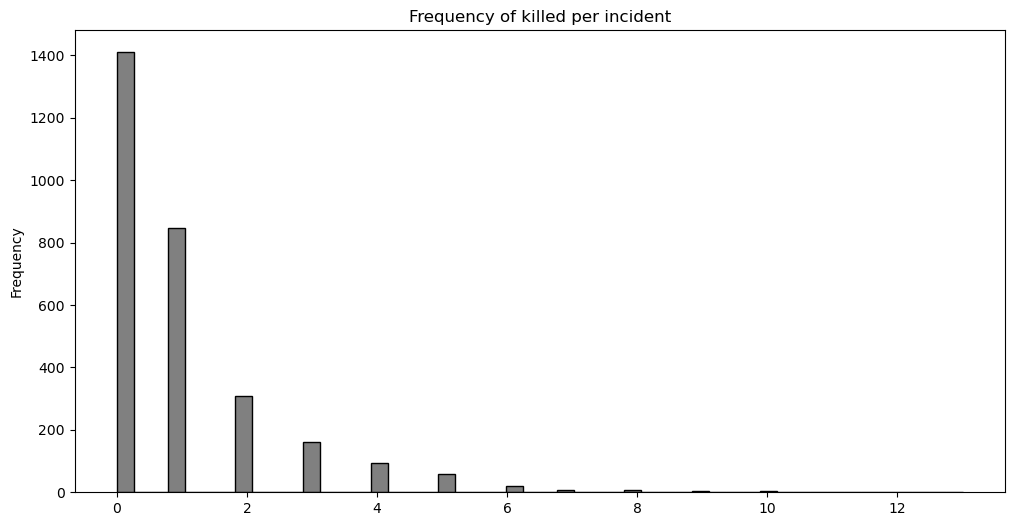

In [35]:
df_cleaned['killed'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black', title = "Frequency of killed per incident")

## Research question/interests

Briefly describe your research question or interests here.